### トーンカーブによる画像変換
- 以下に示すような，画素値の対応表でる```LUT（ルックアップテーブル）```を構築する

| 入力画像（変換前）の画素値 | 補正画像（変換後）の画素値 |
| ---- | ---- |
| 0 | 255 |
| 1 | 254 |
| 2 | 253 |
| 3 | 252 |
| 4 | 251 |
| ･･･ | ･･･ |
| 255 | 0 |

- まず，入力画像（変換前）の画素値テーブルを用意する
    - numpyライブラリを使用する: ```import numpy as np```
    - ```変換前画素値テーブル変数 = np.arange(256)```
        - これにより，```0, 1, 2, ･･･，254, 255```のテーブルを作成できる

In [1]:
import numpy as np
before_pixel_value = np.arange(256)
print(before_pixel_value)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

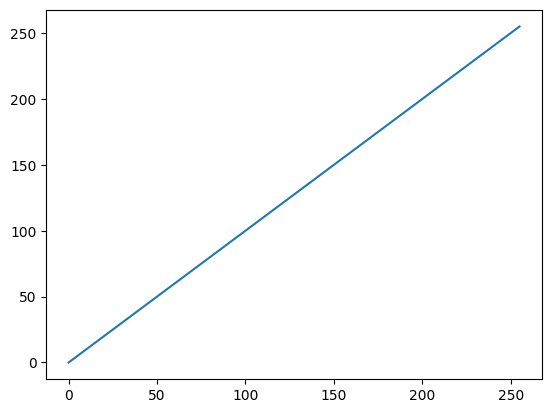

In [2]:
# matplotlibで変換前の画素値テーブルをプロットする
import numpy as np
import matplotlib.pyplot as plt
before_pixel_value = np.arange(256)
plt.plot(before_pixel_value)
plt.show()

- ```np.arange(256)``` で定義した場合，一括に全要素を操作できるため，これを利用して，変換後の画素値テーブルを取得できる
- 変換後の画素値の値が小数になる可能性があるので，```after_pixel_value = after_pixel_value.astype(np.uint8)```のように書いて，小数を整数に直す

In [52]:
import numpy as np
before_pixel_value = np.arange(256)
after_pixel_value = 255 - before_pixel_value # 255 - 各要素
after_pixel_value = after_pixel_value.astype(np.uint8)
print(after_pixel_value)

[255 254 253 252 251 250 249 248 247 246 245 244 243 242 241 240 239 238
 237 236 235 234 233 232 231 230 229 228 227 226 225 224 223 222 221 220
 219 218 217 216 215 214 213 212 211 210 209 208 207 206 205 204 203 202
 201 200 199 198 197 196 195 194 193 192 191 190 189 188 187 186 185 184
 183 182 181 180 179 178 177 176 175 174 173 172 171 170 169 168 167 166
 165 164 163 162 161 160 159 158 157 156 155 154 153 152 151 150 149 148
 147 146 145 144 143 142 141 140 139 138 137 136 135 134 133 132 131 130
 129 128 127 126 125 124 123 122 121 120 119 118 117 116 115 114 113 112
 111 110 109 108 107 106 105 104 103 102 101 100  99  98  97  96  95  94
  93  92  91  90  89  88  87  86  85  84  83  82  81  80  79  78  77  76
  75  74  73  72  71  70  69  68  67  66  65  64  63  62  61  60  59  58
  57  56  55  54  53  52  51  50  49  48  47  46  45  44  43  42  41  40
  39  38  37  36  35  34  33  32  31  30  29  28  27  26  25  24  23  22
  21  20  19  18  17  16  15  14  13  12  11  10   

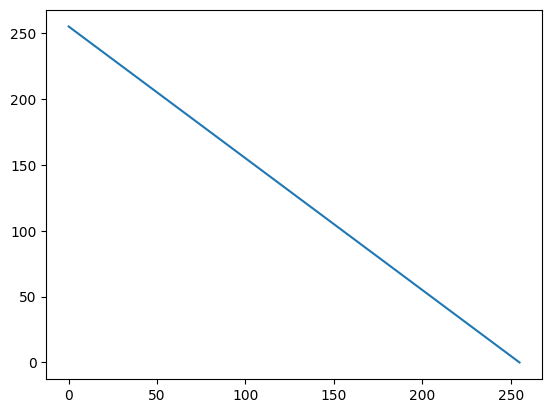

In [53]:
# matplotlibで変換後の画素値テーブルをプロットする
import matplotlib.pyplot as plt
before_pixel_value = np.arange(256)
after_pixel_value = 255 - before_pixel_value # 255 - 各要素
after_pixel_value = after_pixel_value.astype(np.uint8)
plt.plot(after_pixel_value)
plt.show()

### ルックアップテーブルを適用する
- cv2をimportする: ```import cv2```
- ```変換後の画像変数 = cv2.LUT(変換前の画像変数, 変換後の画素値テーブル)```

- まとめると以下のプログラムになる

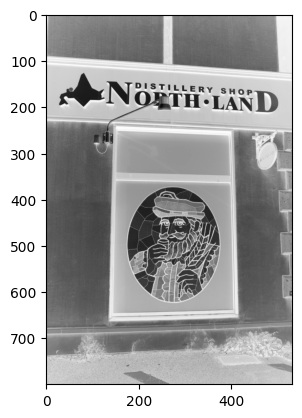

In [54]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 画像読み込み
image = cv2.imread('nikka.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # BGR → グレー

# ルックアップテーブルを作成する
before_pixel_value = np.arange(256) # 変換前
after_pixel_value = 255 - before_pixel_value # 変換後
after_pixel_value = after_pixel_value.astype(np.uint8)

# 画像変換を行う
after_image = cv2.LUT(image, after_pixel_value)

# 画像表示
plt.imshow(after_image)
plt.gray()
plt.show()

### ネガポジ変換
- $変換後の画素（補正画像） = 255 - 変換前の画素（入力画像）$
```python
# ルックアップテーブル例
before_pixel_value = np.arange(256)          # 変換前
after_pixel_value = 255 - before_pixel_value # 変換後
after_pixel_value = after_pixel_value.astype(np.uint8)
```

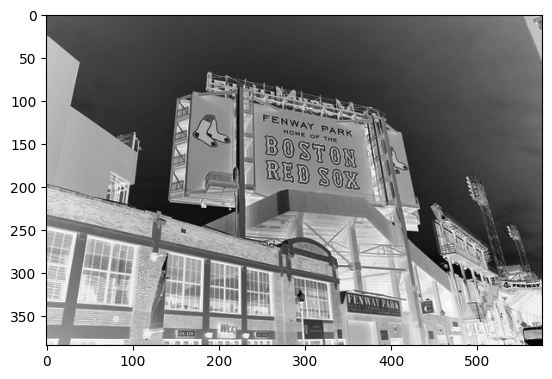

In [55]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 画像読み込み
image = cv2.imread('boston.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # BGR → グレー

# ルックアップテーブルを作成する
# ネガポジ変換
before_pixel_value = np.arange(256) # 変換前
after_pixel_value = 255 - before_pixel_value # 変換後
after_pixel_value = after_pixel_value.astype(np.uint8)

# 画像変換を行う
after_image = cv2.LUT(image, after_pixel_value)

# 画像表示
plt.imshow(after_image)
plt.gray()
plt.show()

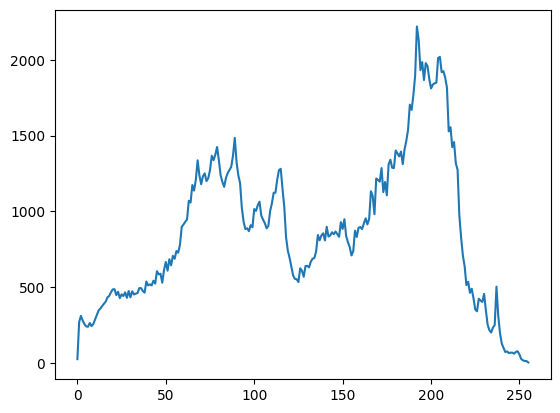

In [7]:
# 入力画像の画素値ヒストグラム
import cv2
import matplotlib.pyplot as plt

# 画像読み込み
image = cv2.imread('boston.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # BGR → グレー

# ヒストグラム作成
hist = cv2.calcHist([image], [0], None, [256], [0,256])

# グラフ表示
plt.plot(hist)
plt.show()

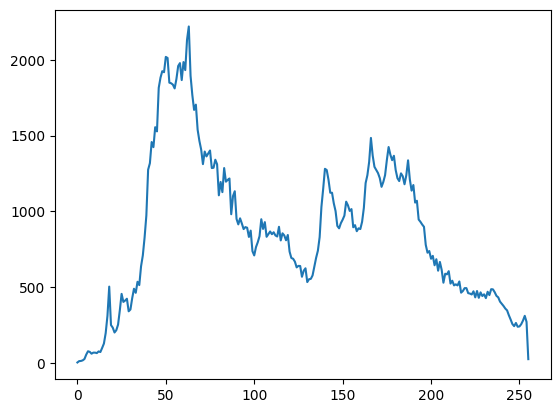

In [56]:
# 変換後画像の画素値ヒストグラム
import cv2
import matplotlib.pyplot as plt

# 画像読み込み
image = cv2.imread('boston.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # BGR → グレー

# ルックアップテーブルを作成する
# ネガポジ変換
before_pixel_value = np.arange(256) # 変換前
after_pixel_value = 255 - before_pixel_value # 変換後
after_pixel_value = after_pixel_value.astype(np.uint8)

# 画像変換を行う
after_image = cv2.LUT(image, after_pixel_value)

# ヒストグラム作成
hist = cv2.calcHist([after_image], [0], None, [256], [0,256])

# グラフ表示
plt.plot(hist)
plt.show()

### 折れ線型トーンカーブ
- 入力画像の画素値0から$a$を0にし，入力画像の画素値$b$から255を255にする画像変換
- 入力画像の画素値$a$から$b$を直線（1次関数）的に変換する

0. $a$と$b$の値を設定する（$a < b$）

1. まず始めに，以下の式で，画素値を変更する（この操作で$a$から$b$が求まる）


```python
after_pixel_value = 255 * (before_pixel_value - a) / (b - a)
```

In [58]:
import numpy as np

a = 55
b = 200
before_pixel_value = np.arange(256)
after_pixel_value = 255 * (before_pixel_value - a) / (b - a)
print(after_pixel_value)

[-96.72413793 -94.96551724 -93.20689655 -91.44827586 -89.68965517
 -87.93103448 -86.17241379 -84.4137931  -82.65517241 -80.89655172
 -79.13793103 -77.37931034 -75.62068966 -73.86206897 -72.10344828
 -70.34482759 -68.5862069  -66.82758621 -65.06896552 -63.31034483
 -61.55172414 -59.79310345 -58.03448276 -56.27586207 -54.51724138
 -52.75862069 -51.         -49.24137931 -47.48275862 -45.72413793
 -43.96551724 -42.20689655 -40.44827586 -38.68965517 -36.93103448
 -35.17241379 -33.4137931  -31.65517241 -29.89655172 -28.13793103
 -26.37931034 -24.62068966 -22.86206897 -21.10344828 -19.34482759
 -17.5862069  -15.82758621 -14.06896552 -12.31034483 -10.55172414
  -8.79310345  -7.03448276  -5.27586207  -3.51724138  -1.75862069
   0.           1.75862069   3.51724138   5.27586207   7.03448276
   8.79310345  10.55172414  12.31034483  14.06896552  15.82758621
  17.5862069   19.34482759  21.10344828  22.86206897  24.62068966
  26.37931034  28.13793103  29.89655172  31.65517241  33.4137931
  35.172413

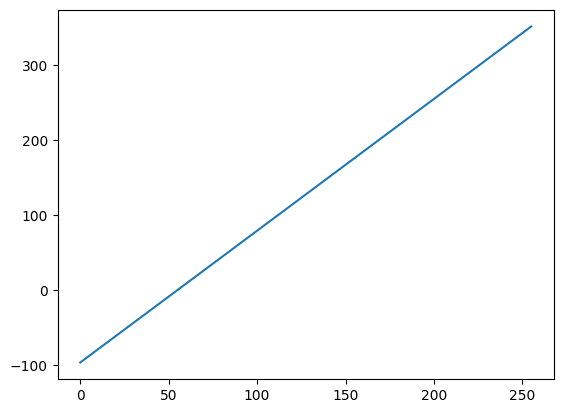

In [59]:
# matplotlibでプロットする
import matplotlib.pyplot as plt

a = 55
b = 200
before_pixel_value = np.arange(256)
after_pixel_value = 255 * (before_pixel_value - a) / (b - a)

plt.plot(after_pixel_value)
plt.show()

2. 次に，求めた変換後の画素値を0から255に収める（この操作で0から$a$，$b$から255が求まる）
```
after_pixel_value = np.clip(after_pixel_value, 0, 255)
```
- ```np.clip(画素値変数, 最小値，最大値)```とかくことで，最小値より小さい値を最小値にし，最大値より大きい値を最大値にする
- この操作の後に，以下の処理を行う（全ての計算が終わった後に行う）
```
after_pixel_value = after_pixel_value.astype(np.uint8)
```

In [60]:
import numpy as np
a = 55
b = 200
before_pixel_value = np.arange(256)
after_pixel_value = 255 * (before_pixel_value - a) / (b - a)
after_pixel_value = np.clip(after_pixel_value, 0, 255)
after_pixel_value = after_pixel_value.astype(np.uint8)
print(after_pixel_value)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   1   3   5   7   8  10  12  14  15  17  19  21  22  24  26  28
  29  31  33  35  36  38  40  42  43  45  47  49  51  52  54  56  58  59
  61  63  65  66  68  70  72  73  75  77  79  80  82  84  86  87  89  91
  93  94  96  98 100 102 103 105 107 109 110 112 114 116 117 119 121 123
 124 126 128 130 131 133 135 137 138 140 142 144 145 147 149 151 153 154
 156 158 160 161 163 165 167 168 170 172 174 175 177 179 181 182 184 186
 188 189 191 193 195 196 198 200 202 204 205 207 209 211 212 214 216 218
 219 221 223 225 226 228 230 232 233 235 237 239 240 242 244 246 247 249
 251 253 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 25

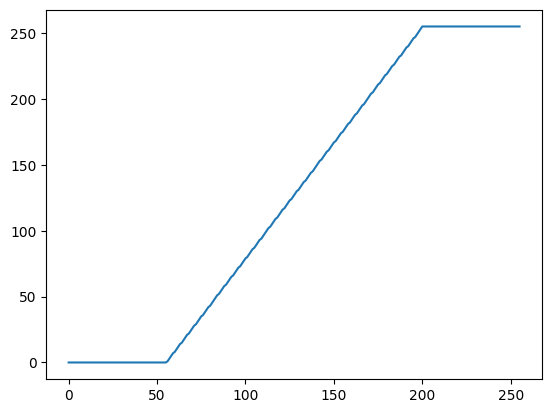

In [61]:
# matplotlibでプロットする
import matplotlib.pyplot as plt

before_pixel_value = np.arange(256)
after_pixel_value = 255 * (before_pixel_value - a) / (b - a)
after_pixel_value = np.clip(after_pixel_value, 0, 255)
after_pixel_value = after_pixel_value.astype(np.uint8)

plt.plot(after_pixel_value)
plt.show()

3. これを変換プログラムと組み合わせる

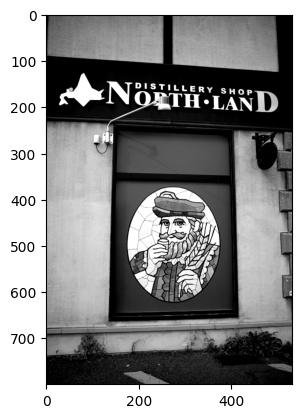

In [62]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 画像読み込み
image = cv2.imread('nikka.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # BGR → グレー

# ルックアップテーブルを作成する
a = 55
b = 200
before_pixel_value = np.arange(256)
after_pixel_value = 255 * (before_pixel_value - a) / (b - a)
after_pixel_value = np.clip(after_pixel_value, 0, 255)
after_pixel_value = after_pixel_value.astype(np.uint8)

# 画像変換を行う
after_image = cv2.LUT(image, after_pixel_value)

# 画像表示
plt.imshow(after_image)
plt.gray()
plt.show()

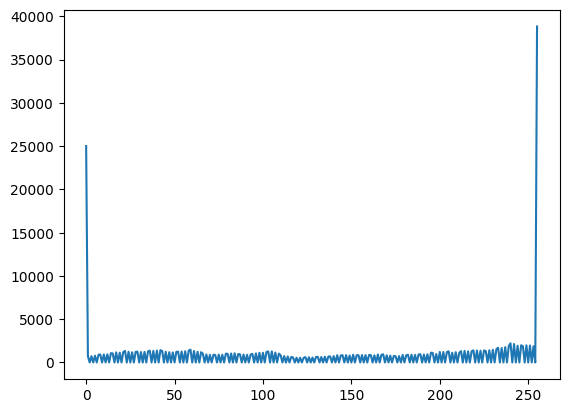

In [63]:
# 変換後画像の画素値ヒストグラム
import cv2
import matplotlib.pyplot as plt

# 画像読み込み
image = cv2.imread('boston.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # BGR → グレー

# ルックアップテーブルを作成する
a = 55
b = 200
before_pixel_value = np.arange(256)
after_pixel_value = 255 * (before_pixel_value - a) / (b - a)
after_pixel_value = np.clip(after_pixel_value, 0, 255)
after_pixel_value = after_pixel_value.astype(np.uint8)

# 画像変換を行う
after_image = cv2.LUT(image, after_pixel_value)

# ヒストグラム作成
hist = cv2.calcHist([after_image], [0], None, [256], [0,256])

# グラフ表示
plt.plot(hist)
plt.show()

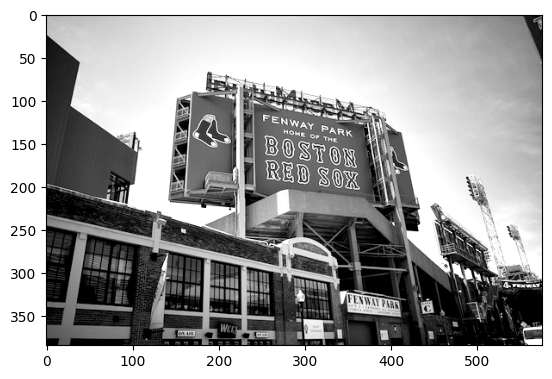

In [64]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 画像読み込み
image = cv2.imread('boston.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # BGR → グレー

# ルックアップテーブルを作成する
a = 45
b = 210
before_pixel_value = np.arange(256)
after_pixel_value = 255 * (before_pixel_value - a) / (b - a)
after_pixel_value = np.clip(after_pixel_value, 0, 255)
after_pixel_value = after_pixel_value.astype(np.uint8)

# 画像変換を行う
after_image = cv2.LUT(image, after_pixel_value)

# 画像表示
plt.imshow(after_image)
plt.gray()
plt.show()

### ガンマ変換
- グレースケール画像のすべての画素値に関して，以下の式を適用する
    - $変換後の画素（補正画像） = 255 * (\frac{変換前の画素（入力画像）}{255})^{\frac{1}{\gamma}}$

```python
# プログラム例
gamma = 3.0
after_pixel_value = 255 * (before_pixel_value / 255) ** (1 / gamma)
after_pixel_value = after_pixel_value.astype(np.uint8)
```

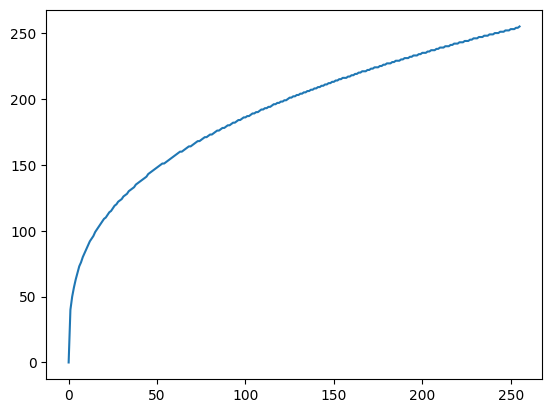

In [65]:
gamma = 3.0 # ガンマの値
before_pixel_value = np.arange(256)
after_pixel_value = 255 * (before_pixel_value / 255) ** (1 / gamma)
after_pixel_value = after_pixel_value.astype(np.uint8)

plt.plot(after_pixel_value)
plt.show()

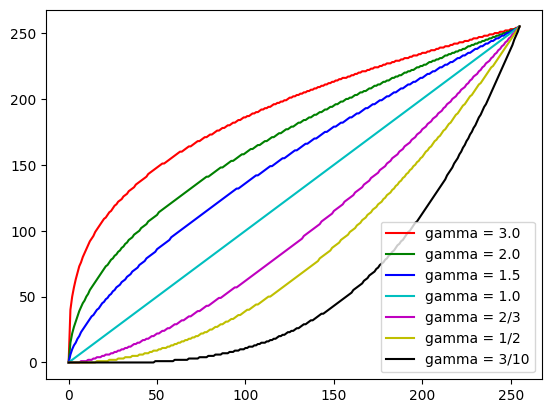

In [66]:
# ガンマの値によるトーンカーブの違い
gamma1 = 3.0
gamma2 = 2.0
gamma3 = 1.5
gamma4 = 1.0
gamma5 = 2/3
gamma6 = 1/2
gamma7 = 3/10

before_pixel_value = np.arange(256)

after_pixel_value1 = 255 * (before_pixel_value / 255) ** (1 / gamma1)
after_pixel_value1 = after_pixel_value1.astype(np.uint8)

after_pixel_value2 = 255 * (before_pixel_value / 255) ** (1 / gamma2)
after_pixel_value2 = after_pixel_value2.astype(np.uint8)

after_pixel_value3 = 255 * (before_pixel_value / 255) ** (1 / gamma3)
after_pixel_value3 = after_pixel_value3.astype(np.uint8)

after_pixel_value4 = 255 * (before_pixel_value / 255) ** (1 / gamma4)
after_pixel_value4 = after_pixel_value4.astype(np.uint8)

after_pixel_value5 = 255 * (before_pixel_value / 255) ** (1 / gamma5)
after_pixel_value5 = after_pixel_value5.astype(np.uint8)

after_pixel_value6 = 255 * (before_pixel_value / 255) ** (1 / gamma6)
after_pixel_value6 = after_pixel_value6.astype(np.uint8)

after_pixel_value7 = 255 * (before_pixel_value / 255) ** (1 / gamma7)
after_pixel_value7 = after_pixel_value7.astype(np.uint8)

plt.plot(after_pixel_value1, color='r', label='gamma = 3.0')
plt.plot(after_pixel_value2, color='g', label='gamma = 2.0')
plt.plot(after_pixel_value3, color='b', label='gamma = 1.5')
plt.plot(after_pixel_value4, color='c', label='gamma = 1.0')
plt.plot(after_pixel_value5, color='m', label='gamma = 2/3')
plt.plot(after_pixel_value6, color='y', label='gamma = 1/2')
plt.plot(after_pixel_value7, color='k', label='gamma = 3/10')

plt.legend()
plt.show()

### ガンマ変換
- 一般的に，ガンマの値が1より大きいと，明るくする画像変換
- 一般的に，ガンマの値が1より小さいと，暗くする画像変換

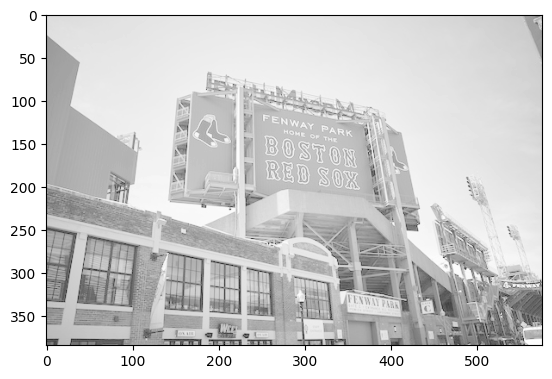

In [67]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 画像読み込み
image = cv2.imread('boston.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # BGR → グレー

# ルックアップテーブルを作成する
gamma = 3.0
before_pixel_value = np.arange(256)
after_pixel_value = 255 * (before_pixel_value / 255) ** (1 / gamma)
after_pixel_value = after_pixel_value.astype(np.uint8)

# 画像変換を行う
after_image = cv2.LUT(image, after_pixel_value)

# 画像表示
plt.imshow(after_image)
plt.gray()
plt.show()

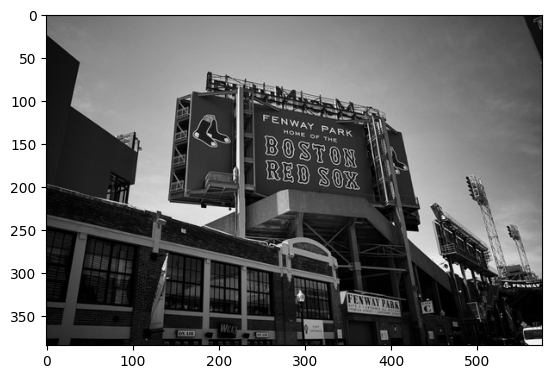

In [68]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 画像読み込み
image = cv2.imread('boston.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # BGR → グレー

# ルックアップテーブルを作成する
gamma = 0.5
before_pixel_value = np.arange(256)
after_pixel_value = 255 * (before_pixel_value / 255) ** (1 / gamma)
after_pixel_value = after_pixel_value.astype(np.uint8)

# 画像変換を行う
after_image = cv2.LUT(image, after_pixel_value)

# 画像表示
plt.imshow(after_image)
plt.gray()
plt.show()

### ポスタリゼーション
- 切り捨て除算（演算子: ```//```）をうまく使用すると画素値を均等分割できる
- 例: 2段階
    - 画素値0〜127は```128```で切り捨て除算すると，値は```0```となる
    - 画素値128〜255は```128```で切り捨て除算すると，値は```1```となる
        - ```128```は```256```を```2で割った値```である
    
- 例: 4段階
    - 画素値0〜63は```64```で切り捨て除算すると，値は```0```となる
    - 画素値64〜127は```64```で切り捨て除算すると，値は```1```となる
    - 画素値128〜191は```64```で切り捨て除算すると，値は```2```となる
    - 画素値192〜255は```64```で切り捨て除算すると，値は```3```となる
        -```64```は```256```を```4で割った値```である

- 2段階の場合，以下のように書くと，切り捨て除算を使用すると，1行でかける
```python
# プログラム例
level = 2 # 2段階
before_pixel_value = np.arange(256)
after_pixel_value = before_pixel_value // (256 / level) * 255 / (level - 1)
after_pixel_value = after_pixel_value.astype(np.uint8)
```

In [69]:
# プログラム例
import numpy as np
level = 4 # 4段階
before_pixel_value = np.arange(256)
after_pixel_value = before_pixel_value // (256 / level) * 255 / (level - 1)
after_pixel_value = after_pixel_value.astype(np.uint8)
print(after_pixel_value)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  85  85  85  85  85  85  85  85
  85  85  85  85  85  85  85  85  85  85  85  85  85  85  85  85  85  85
  85  85  85  85  85  85  85  85  85  85  85  85  85  85  85  85  85  85
  85  85  85  85  85  85  85  85  85  85  85  85  85  85  85  85  85  85
  85  85 170 170 170 170 170 170 170 170 170 170 170 170 170 170 170 170
 170 170 170 170 170 170 170 170 170 170 170 170 170 170 170 170 170 170
 170 170 170 170 170 170 170 170 170 170 170 170 170 170 170 170 170 170
 170 170 170 170 170 170 170 170 170 170 170 170 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 25

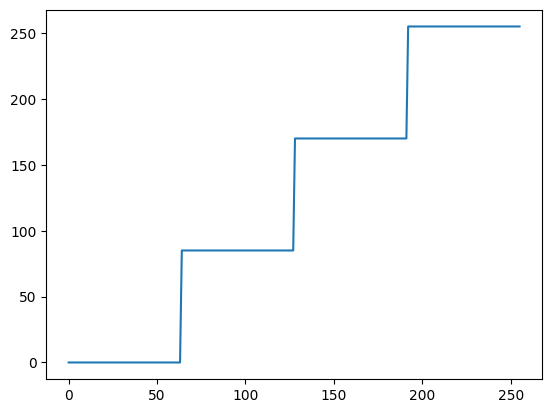

In [70]:
# matplotlibでプロットする
import numpy as np
import matplotlib.pyplot as plt
level = 4 # 2段階
before_pixel_value = np.arange(256)
after_pixel_value = before_pixel_value // (256 / level) * 255 / (level - 1)
after_pixel_value = after_pixel_value.astype(np.uint8)
plt.plot(after_pixel_value)
plt.show()

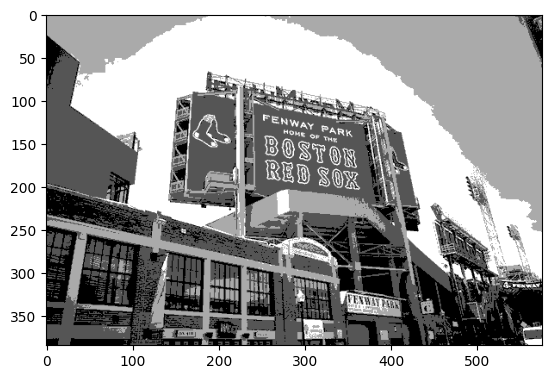

In [71]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 画像読み込み
image = cv2.imread('boston.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # BGR → グレー

# ルックアップテーブルを作成する
level = 4 # 4段階
before_pixel_value = np.arange(256)
after_pixel_value = before_pixel_value // (256 / level) * 255 / (level - 1)
after_pixel_value = after_pixel_value.astype(np.uint8)

# 画像変換を行う
after_image = cv2.LUT(image, after_pixel_value)

# 画像表示
plt.imshow(after_image)
plt.gray()
plt.show()

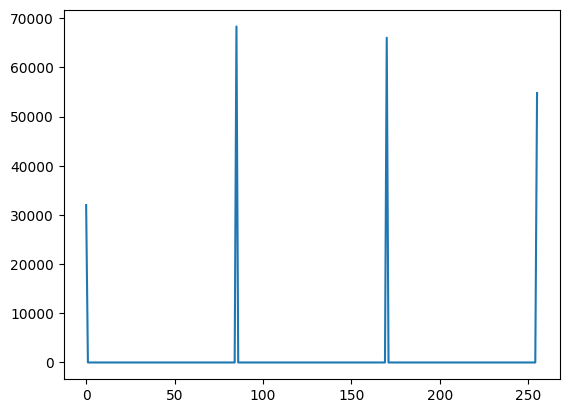

In [72]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 画像読み込み
image = cv2.imread('boston.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # BGR → グレー

# ルックアップテーブルを作成する
level = 4 # 4段階
before_pixel_value = np.arange(256)
after_pixel_value = before_pixel_value // (256 / level) * 255 / (level - 1)
after_pixel_value = after_pixel_value.astype(np.uint8)

# 画像変換を行う
after_image = cv2.LUT(image, after_pixel_value)

# ヒストグラム作成
hist = cv2.calcHist([after_image], [0], None, [256], [0,256])

# グラフ表示
plt.plot(hist)
plt.show()

### 演習1
- iTossにあるsoya.jpegに対して，ルックアップテーブルを作成し，以下の画像変換を行いなさい（グレースケール画像で読み込んで変換を行うこと）
1. ネガポジ変換
2. ガンマ変換（γ = 1.5）
3. ガンマ変換（γ = 0.3）
4. 折れ線型トーンカーブ (a = 65, b = 190) 
5. ポスタリゼーション（8段階）

### 演習2
- $a$以上$b$を指定し，画素値を$a$以上$b$以下で直線（1次関数）の関係で収まるように変換するためには，どのようにルックアップテーブルを作成するプログラムを書けば良いか答えなさい．（次回内容）
    - 例: $a = 50$, $b = 200$とすると，変換後の画素値が50〜200になる． 
![Q1](./fig/11-8.png)
